In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
from pandas.io.json import json_normalize 
import requests
import json

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
from matplotlib.pyplot import figure

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


# Modelos por ciudad

In [2]:
data = pd.read_csv("boston_dataset.csv")

In [3]:
print(data.shape)
data.head(1)

(305101, 8)


,hora,km_to_CO,start station id,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,date_local,contaminante_co
0,6,2.5395,3,1,2.3593,975,2019-01-01,0.151


In [4]:
df = data.drop(columns = ["km_to_CO", "start station id", "date_local"])
df.head(1)

,hora,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,contaminante_co
0,6,1,2.3593,975,0.151


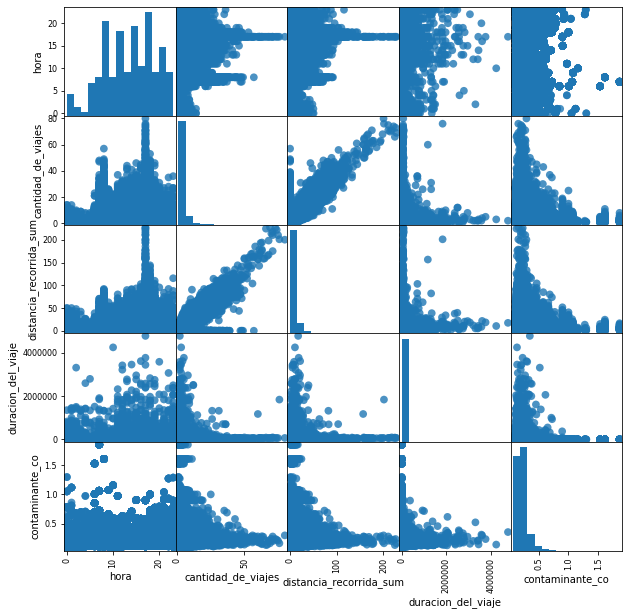

In [5]:
pd.plotting.scatter_matrix(df, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 15}, s = 60, alpha = 0.8)
plt.show()

In [85]:
#removing outliers
#df_12 = df_12[df_12["duracion_del_viaje"] <= 10000]

**Data train/test**

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
test.sort_values(by = 'cantidad_de_viajes', ascending = True, inplace = True) #just for visualization purposes


/Users/wera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
#OPTIONAL scale numerical features, not the label
#scaler = MinMaxScaler()
#df[df.columns] = scaler.fit_transform(df[df.columns])



**Regresión lineal**

In [8]:
#Linera regression
lr = linear_model.LinearRegression()

#Train LR
lr.fit(train.drop("contaminante_co", axis=1), train["contaminante_co"])

#Predictions with LR
y_pred_lr = lr.predict(test.drop("contaminante_co", axis=1))

In [9]:
#Mean Squared Error, Determination Coefficient and Coefficients from LR
mse_lr = np.sqrt(mean_squared_error(test["contaminante_co"], y_pred_lr))
r2_lr = r2_score(test["contaminante_co"], y_pred_lr)

print(f"Square root of the mean squared error: {round(mse_lr, 4)}")
print(f"Determination Coeficient: {round(r2_lr, 4)}")
print('Coefficients: \n', lr.coef_)

Square root of the mean squared error: 0.092
Determination Coeficient: 0.0059
Coefficients: 
 [ 1.22538274e-03 -5.06885309e-04 -3.74212918e-07 -9.04998367e-09]


In [10]:
test_sort = test.sort_index(axis = 0) 

#predicción sort
y_pred_lr_sort = lr.predict(test_sort.drop("contaminante_co", axis=1))

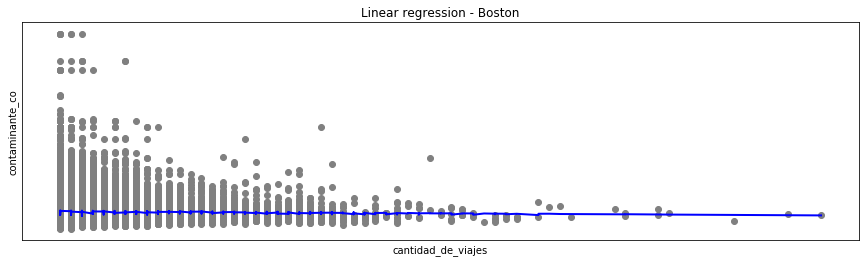

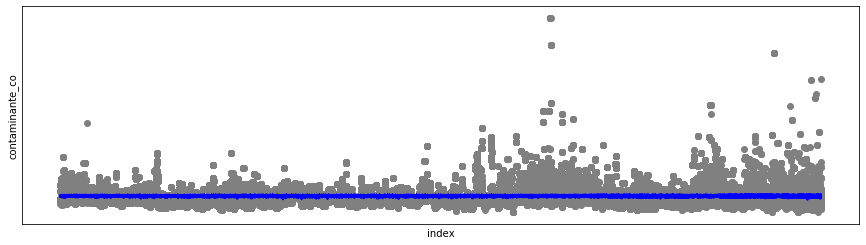

In [11]:
#Plot
figure(figsize=(15, 4))
plt.scatter(test['cantidad_de_viajes'], test["contaminante_co"],  color='grey')
plt.plot(test['cantidad_de_viajes'], y_pred_lr , color='blue', linewidth=2)

plt.title("Linear regression - Boston")

plt.xticks(())
plt.yticks(())
plt.xlabel('cantidad_de_viajes')
plt.ylabel("contaminante_co")
plt.show()

#Plot - sort
figure(figsize=(15, 4))
plt.scatter(test_sort.index, test_sort["contaminante_co"],  color='grey')
plt.plot(test_sort.index, y_pred_lr_sort , color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())
plt.xlabel('index')
plt.ylabel("contaminante_co")
plt.show()

**Decision tree**

In [12]:
#Decision tree
tree = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators = 1, random_state = 0) #max_depth = 5, 

#Train
tree.fit(train.drop("contaminante_co", axis = 1), train["contaminante_co"])

#Predictions with DT
y_pred_tree = tree.predict(test.drop("contaminante_co", axis=1))

In [13]:
#Mean Squared Error and Determination Coefficient
mse_tree = np.sqrt(mean_squared_error(test["contaminante_co"], y_pred_tree))
r2_tree = r2_score(test["contaminante_co"], y_pred_tree)

print(f"Square root of the mean squared error: {round(mse_tree, 4)}")
print(f"Determination Coeficient: {round(r2_tree, 4)}")

Square root of the mean squared error: 0.1302
Determination Coeficient: -0.9909


In [14]:
#test_sort = test.sort_index(axis = 0) 

#predicción sort
y_pred_tree_sort = tree.predict(test.drop("contaminante_co", axis = 1))

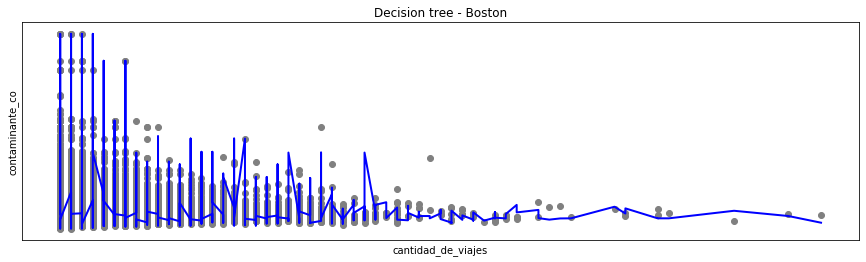

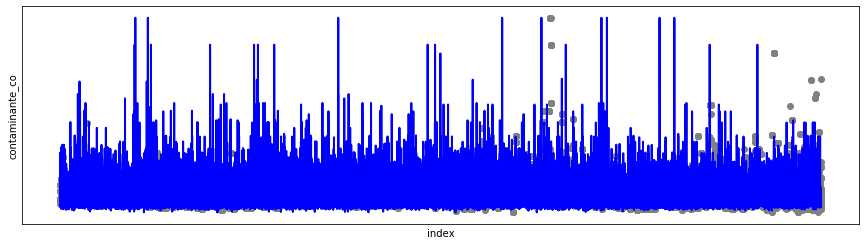

In [15]:
#Plot
figure(figsize=(15, 4))
plt.scatter(test['cantidad_de_viajes'], test["contaminante_co"],  color='grey')
plt.plot(test['cantidad_de_viajes'], y_pred_tree , color='blue', linewidth=2)

plt.title("Decision tree - Boston")

plt.xticks(())
plt.yticks(())
plt.xlabel('cantidad_de_viajes')
plt.ylabel("contaminante_co")
plt.show()

#Plot - sort
figure(figsize=(15, 4))
plt.scatter(test_sort.index, test_sort["contaminante_co"],  color='grey')
plt.plot(test_sort.index, y_pred_tree_sort , color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())
plt.xlabel('index')
plt.ylabel("contaminante_co")
plt.show()

**Neural network - MLP** Multi-layer Perceptron regressor

In [16]:
#Multi-layer Perceptron regressor
mlp = MLPRegressor(random_state = 1, max_iter = 500) 

#Train
mlp.fit(train.drop("contaminante_co", axis = 1), train["contaminante_co"])

#Predictions with MLP
y_pred_mlp = mlp.predict(test.drop("contaminante_co", axis=1))

In [17]:
#Mean Squared Error and Determination Coefficient
mse_mlp = np.sqrt(mean_squared_error(test["contaminante_co"], y_pred_mlp))
r2_mlp = r2_score(test["contaminante_co"], y_pred_mlp)

print(f"Square root of the mean squared error: {round(mse_mlp, 4)}")
print(f"Determination Coeficient: {round(r2_mlp, 4)}")

Square root of the mean squared error: 1.866
Determination Coeficient: -407.82


In [18]:
#test_sort = test.sort_index(axis = 0) 

#predicción sort
y_pred_mlp_sort = mlp.predict(test.drop("contaminante_co", axis = 1))

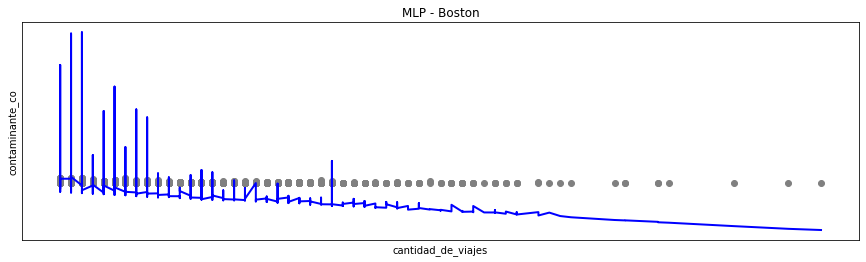

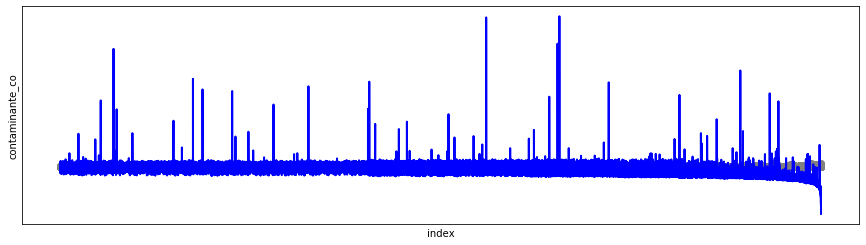

In [19]:
#Plot
figure(figsize=(15, 4))
plt.scatter(test['cantidad_de_viajes'], test["contaminante_co"],  color='grey')
plt.plot(test['cantidad_de_viajes'], y_pred_mlp , color='blue', linewidth=2)

plt.title("MLP - Boston")

plt.xticks(())
plt.yticks(())
plt.xlabel('cantidad_de_viajes')
plt.ylabel("contaminante_co")
plt.show()

#Plot - sort
figure(figsize=(15, 4))
plt.scatter(test_sort.index, test_sort["contaminante_co"],  color='grey')
plt.plot(test_sort.index, y_pred_mlp_sort , color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())
plt.xlabel('index')
plt.ylabel("contaminante_co")
plt.show()